In [1]:
import pandas as pd
import numpy as np

def preprocess_df(df: pd.DataFrame) -> np.ndarray:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['measurement_id'] = df['measurement_id'].astype('string')
    df['area'] = pd.Categorical(df['area'])
    df['city'] = pd.Categorical(df['city'])
    df.drop(
        columns=[
            'datetime',
            'measurement_id',
            'lat',
            'long',
            'area',
            'city',
        ],
        inplace=True,
    )
    # df = df[['weather_temp']]
    df = df[:75000]

    df_arr = df.to_numpy()

    # for i, _ in enumerate(df_arr):
    #     df_arr[i, 0] = np.datetime64(df_arr[i, 0])

    return df_arr


def create_model(data: np.ndarray) -> models.Sequential:
    model = models.Sequential([
        layers.LSTM(150,
                    return_sequences=True,
                    input_shape=[100, data.shape[2]]),
        layers.LSTM(110, return_sequences=True),
        layers.TimeDistributed(layers.Dense(17)),
    ])

    model.compile(loss='mse',
                  optimizer=keras.optimizers.Adam(0.003),
                  metrics=['accuracy'])

    return model


def main() -> None:
    df: pd.DataFrame = pd.read_csv('final_df.csv')
    df: np.ndarray = preprocess_df(df)
    a = np.max(df)
    df = df / np.max(df)

    # df = df.reshape(df.shape[0], df.shape[1], 1)
    n = 75000
    samples = []
    length = 100
    for i in range(0, n, length):
        sample = df[i:i + length]
        samples.append(sample)

    print(len(samples))
    # df = df.reshape((len(samples), length, 17))

    samples = np.array(samples)
    # samples = samples / max(samples)
    print(samples.shape)
    X_train = samples[:600]
    # X_test = samples[70000:]
    y_train = samples[100:700]
    # y_test = samples[7000:]

    model = create_model(data=samples)
    # print(model.summary())
    history = model.fit(X_train, y_train, epochs=30)

    x = model.predict([X_train]) * a
    print(x)




NameError: name 'models' is not defined

In [2]:
import pandas as pd 
df: pd.DataFrame = pd.read_csv('final_df.csv')
df: np.ndarray = preprocess_df(df)
a = np.max(df)
df

array([[7.00000000e+00, 8.60000000e+01, 9.86100000e+02, ...,
        1.56008932e+00, 2.68948727e+06, 2.23629150e+01],
       [6.10000000e+00, 7.60000000e+01, 9.89900000e+02, ...,
        1.82760732e+00, 2.62002427e+06, 2.23167630e+01],
       [1.60600000e+01, 8.80000000e+01, 9.88500000e+02, ...,
        1.27184306e+00, 2.73862690e+06, 2.24017600e+01],
       ...,
       [2.12800000e+01, 7.80000000e+01, 9.91200000e+02, ...,
        3.15147917e+00, 2.72337223e+06, 2.35049460e+01],
       [2.19000000e+01, 9.00000000e+01, 9.92000000e+02, ...,
        3.39047588e+00, 2.62788341e+06, 2.35009210e+01],
       [2.13900000e+01, 7.90000000e+01, 9.91500000e+02, ...,
        3.27095185e+00, 2.63349846e+06, 2.33624670e+01]])

In [3]:
df = df / np.max(df)
df1=df*a.T

In [4]:
df1

array([[7.00000000e+00, 8.60000000e+01, 9.86100000e+02, ...,
        1.56008932e+00, 2.68948727e+06, 2.23629150e+01],
       [6.10000000e+00, 7.60000000e+01, 9.89900000e+02, ...,
        1.82760732e+00, 2.62002427e+06, 2.23167630e+01],
       [1.60600000e+01, 8.80000000e+01, 9.88500000e+02, ...,
        1.27184306e+00, 2.73862690e+06, 2.24017600e+01],
       ...,
       [2.12800000e+01, 7.80000000e+01, 9.91200000e+02, ...,
        3.15147917e+00, 2.72337223e+06, 2.35049460e+01],
       [2.19000000e+01, 9.00000000e+01, 9.92000000e+02, ...,
        3.39047588e+00, 2.62788341e+06, 2.35009210e+01],
       [2.13900000e+01, 7.90000000e+01, 9.91500000e+02, ...,
        3.27095185e+00, 2.63349846e+06, 2.33624670e+01]])

In [5]:
dfmy=pd.read_csv('final_df.csv')

In [6]:
dfmy


,datetime,weather_temp,weather_humidity,barometric_pressure,measurement_id,pol_co,pol_so2,pol_no2,pol_pm10,pol_pm25,pol_co2,aqi,lat,long,indpro,area,city,active_population,traf
0,2015-04-25 09:00:00,7.00,86,986.1,63rdStreetWeatherStation201504250900,1.886814,-1.922738,73.127127,310,88.079346,414,36.646045,41.7792,87.5909,1.560089,63rd Street Weather Station,Chicago,2.689487e+06,22.362915
1,2015-04-30 05:00:00,6.10,76,989.9,63rdStreetWeatherStation201504300500,0.144130,-1.896839,60.486900,209,81.675959,399,37.895171,41.7792,87.5909,1.827607,63rd Street Weather Station,Chicago,2.620024e+06,22.316763
2,2015-05-26 11:00:00,16.06,88,988.5,FosterWeatherStation201505261100,0.237003,89.216090,58.740508,378,15.301826,407,38.413979,41.8500,71.7600,1.271843,Foster Weather Station,Chicago,2.738627e+06,22.401760
3,2015-05-26 12:00:00,17.17,86,987.5,FosterWeatherStation201505261200,0.601039,106.522793,28.050467,417,73.040000,402,38.008994,41.8500,71.7600,1.066337,Foster Weather Station,Chicago,2.726025e+06,22.474620
4,2015-05-26 14:00:00,21.00,81,986.8,FosterWeatherStation201505261400,0.566720,68.815782,11.231234,156,-0.583177,409,38.002114,41.8500,71.7600,1.124407,Foster Weather Station,Chicago,2.664541e+06,22.590065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74981,2018-07-23 15:00:00,21.39,76,991.5,FosterWeatherStation201807231500,1.551011,6.223080,44.188684,327,89.767064,407,47.098414,41.8500,71.7600,3.379866,Foster Weather Station,Chicago,2.739591e+06,23.657540
74982,2018-07-23 16:00:00,22.20,89,991.7,63rdStreetWeatherStation201807231600,0.553526,38.637579,49.310923,381,-8.094447,394,45.050067,41.7792,87.5909,2.933097,63rd Street Weather Station,Chicago,2.811406e+06,23.613022
74983,2018-07-23 16:00:00,21.28,78,991.2,FosterWeatherStation201807231600,1.495981,43.492837,53.296917,338,9.581206,414,44.665141,41.8500,71.7600,3.151479,Foster Weather Station,Chicago,2.723372e+06,23.504946
74984,2018-07-23 17:00:00,21.90,90,992.0,63rdStreetWeatherStation201807231700,1.413450,20.202380,20.907758,123,32.750006,411,43.566812,41.7792,87.5909,3.390476,63rd Street Weather Station,Chicago,2.627883e+06,23.500921


In [7]:
dfai=dfmy[["weather_temp","indpro","traf","aqi","weather_humidity"]]

In [8]:
dfai

,weather_temp,indpro,traf,aqi,weather_humidity
0,7.00,1.560089,22.362915,36.646045,86
1,6.10,1.827607,22.316763,37.895171,76
2,16.06,1.271843,22.401760,38.413979,88
3,17.17,1.066337,22.474620,38.008994,86
4,21.00,1.124407,22.590065,38.002114,81
...,...,...,...,...,...
74981,21.39,3.379866,23.657540,47.098414,76
74982,22.20,2.933097,23.613022,45.050067,89
74983,21.28,3.151479,23.504946,44.665141,78
74984,21.90,3.390476,23.500921,43.566812,90


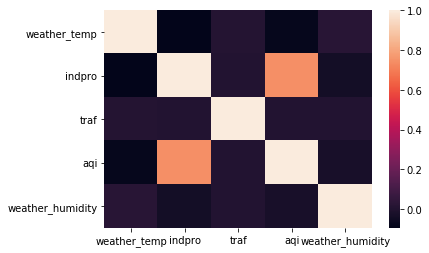

In [9]:
import seaborn as sns
sns.heatmap(dfai.corr())

In [10]:
dfai["nextaqi"]=0
dfai["next2aqi"]=0
dfai["next3aqi"]=0
dfai["next4aqi"]=0
dfai["next5aqi"]=0
dfai["next6aqi"]=0
dfai["next7aqi"]=0
dfai["next8aqi"]=0
dfai["next9aqi"]=0
dfai["next10aqi"]=0


/home/kaypee/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kaypee/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kaypee/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [11]:
dfai['SMAaqi'] = dfai.aqi.rolling(5).mean()
dfai['SMAaqi10'] = dfai.aqi.rolling(10).mean()

/home/kaypee/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kaypee/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
for i in range(len(df)-11):
    dfai["nextaqi"][i]=dfai["aqi"][i+1]
    dfai["next2aqi"][i]=dfai["aqi"][i+2]
    dfai["next3aqi"][i]=dfai["aqi"][i+3]
    dfai["next4aqi"][i]=dfai["aqi"][i+4]
    dfai["next5aqi"][i]=dfai["aqi"][i+5]
    dfai["next6aqi"][i]=dfai["aqi"][i+6]
    dfai["next7aqi"][i]=dfai["aqi"][i+7]
    dfai["next8aqi"][i]=dfai["aqi"][i+8]
    dfai["next9aqi"][i]=dfai["aqi"][i+9]
    dfai["next10aqi"][i]=dfai["aqi"][i+10]

/home/kaypee/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kaypee/miniconda3/envs/ds/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/kaypee/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [14]:
dfai[5:74974]
# max_array=np.max(dfai)
# dfai=dfai/np.max(dfai)

,weather_temp,indpro,traf,aqi,weather_humidity,nextaqi,next2aqi,next3aqi,next4aqi,next5aqi,next6aqi,next7aqi,next8aqi,next9aqi,next10aqi,SMAaqi,SMAaqi10
5,20.80,1.956274,22.725199,39.153250,86,36,36,37,36,35,35,36,35,35,35,38.294701,NaN
6,22.78,1.191181,22.793041,36.339233,63,36,37,36,35,35,36,35,35,35,36,37.983514,NaN
7,21.70,1.575071,22.987848,36.576984,76,37,36,35,35,36,35,35,35,36,37,37.616115,NaN
8,23.28,1.209022,23.062277,37.413780,65,36,35,35,36,35,35,35,36,37,36,37.497072,NaN
9,24.00,1.800101,23.217627,36.441022,66,35,35,36,35,35,35,36,37,36,37,37.184854,37.489057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74969,19.67,3.316929,22.852757,41.797648,77,42,42,43,44,45,45,46,46,48,49,42.481832,43.232925
74970,19.89,3.517678,22.997460,42.579636,79,42,43,44,45,45,46,46,48,49,46,42.299712,42.988662
74971,20.60,3.201367,23.083065,42.243363,89,43,44,45,45,46,46,48,49,46,47,42.292571,42.701063
74972,20.90,3.184436,23.148376,43.380518,89,44,45,45,46,46,48,49,46,47,45,42.467463,42.597459


In [73]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

def create_model(data: np.ndarray) -> models.Sequential:
    model = models.Sequential([
    layers.Dense(20 activation='relu', input_shape=[2]),
    layers.Dense(10, activation='relu'),
    layers.Dense(5),
    ])

    model.compile(loss='mse',
                  optimizer=keras.optimizers.Adam(0.003),
                  metrics=['accuracy'])

    return model

SyntaxError: invalid syntax (<ipython-input-73-920a46a0ee86>, line 9)

In [74]:
dfai_train=dfai[:50000]

In [75]:
dfai_trainset=dfai_train[["indpro","traf"]]

In [76]:
dfai_yset=dfai_train[["aqi","nextaqi","next2aqi","next3aqi","next4aqi"]]

In [77]:
model = create_model(data=dfai_train)
    # print(model.summary())
history = model.fit(dfai_trainset, dfai_yset,epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 61us/sample - loss: 166.2761 - accuracy: 0.3097
Epoch 2/10
50000/50000 [==============================] - 3s 54us/sample - loss: 2.0644 - accuracy: 0.3786
Epoch 3/10
50000/50000 [==============================] - 3s 59us/sample - loss: 2.0597 - accuracy: 0.3786
Epoch 4/10
50000/50000 [==============================] - 3s 58us/sample - loss: 2.0678 - accuracy: 0.3786
Epoch 5/10
50000/50000 [==============================] - 3s 64us/sample - loss: 2.0600 - accuracy: 0.3786
Epoch 6/10
50000/50000 [==============================] - 3s 55us/sample - loss: 2.0556 - accuracy: 0.3786
Epoch 7/10
50000/50000 [==============================] - 3s 61us/sample - loss: 2.0601 - accuracy: 0.3786
Epoch 8/10
50000/50000 [==============================] - 3s 56us/sample - loss: 2.0436 - accuracy: 0.3786
Epoch 9/10
50000/50000 [==============================] - 3s 55us/sample - loss: 2.0330 - accuracy: 0.3786
Epoch 10/10


In [78]:
a=model.predict(dfai_trainset)

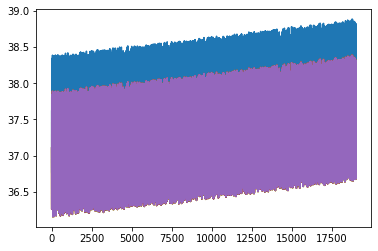

In [87]:
import matplotlib.pyplot as plt
# plt.plot(dfai_trainset[:1000])
plt.plot(a[:19000])

In [80]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(dfai_trainset,dfai_yset)
a=model.score(dfai_trainset,dfai_yset)
a=model.predict(dfai_trainset)

/home/kaypee/miniconda3/envs/ds/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


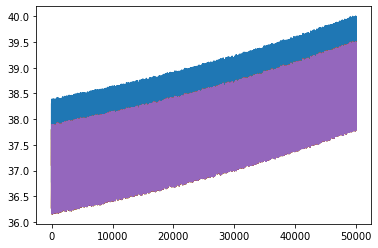

In [81]:
plt.plot(a)